In [10]:
from typing import List, Tuple
import matplotlib.pyplot as plt

class TradingOptimizer:
    def __init__(self):
        # Define the trading rates
        self.rates = {
            'SeaShells': {'Snowballs': 1.34, 'Pizzas': 1.98, 'SiliconNuggets': 0.64},
            'Snowballs': {'Pizzas': 1.45, 'SiliconNuggets': 0.52, 'SeaShells': 0.72},
            'Pizzas': {'Snowballs': 0.7, 'SiliconNuggets': 0.31, 'SeaShells': 0.48},
            'SiliconNuggets': {'Snowballs': 1.95, 'Pizzas': 3.1, 'SeaShells': 1.49}
        }
        self.all_sequences = []
        self.best_sequence = []
        self.best_profit = 0

    def find_all_trades(self, current_amount: float, current_currency: str, trades_left: int, sequence: List[Tuple[str, float]]) -> None:
        # Store the sequence if it ends with SeaShells
        if current_currency == 'SeaShells' and len(sequence) > 1:
            self.all_sequences.append(sequence.copy())
            initial_amount = sequence[0][1]
            final_amount = sequence[-1][1]
            profit = final_amount - initial_amount
            if profit > self.best_profit:
                self.best_profit = profit
                self.best_sequence = sequence.copy()

        # Base case: if no trades left
        if trades_left == 0:
            return

        # Try all possible trades
        for next_currency, rate in self.rates[current_currency].items():
            new_amount = current_amount * rate
            sequence.append((next_currency, new_amount))
            self.find_all_trades(new_amount, next_currency, trades_left - 1, sequence)
            sequence.pop()

    def explore_trades(self, initial_amount: float, max_trades: int) -> None:
        initial_sequence = [('SeaShells', initial_amount)]
        self.find_all_trades(initial_amount, 'SeaShells', max_trades, initial_sequence)

    def plot_all_sequences(self) -> None:
        plt.figure(figsize=(12, 8))

        for sequence in self.all_sequences:
            steps = [i for i in range(len(sequence))]
            amounts = [amount for _, amount in sequence]
            if sequence == self.best_sequence:
                plt.plot(steps, amounts, marker='o', color='red', label='Best Sequence: ' + ' -> '.join([currency for currency, _ in sequence]))
            else:
                plt.plot(steps, amounts, marker='o', color='blue')

        plt.xlabel('Trade Step')
        plt.ylabel('Amount')
        plt.title('All Trading Sequences')
        plt.grid(True)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.show()

Starting amount: 500 SeaShells
Exploring all sequences up to 5 trades...



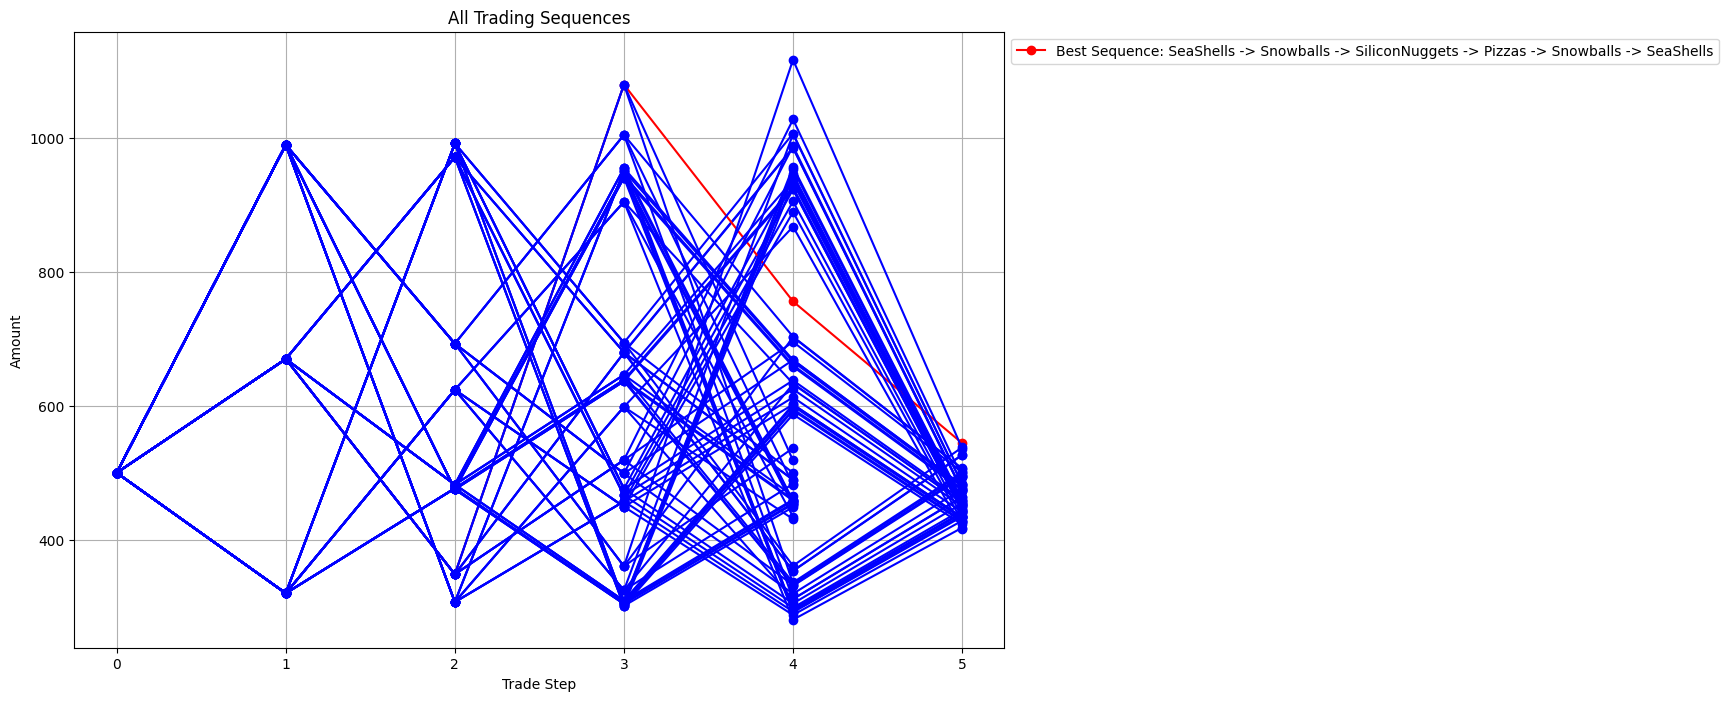

In [11]:
def main():
    # Initialize the optimizer
    optimizer = TradingOptimizer()

    # Explore all trading sequences
    initial_amount = 500
    max_trades = 5

    print(f"Starting amount: {initial_amount} SeaShells")
    print(f"Exploring all sequences up to {max_trades} trades...\n")

    optimizer.explore_trades(initial_amount, max_trades)
    optimizer.plot_all_sequences()

if __name__ == "__main__":
    main()